## Supervised Machine Learning
Supervised Machine Learning

The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

#### Supervised machine learning problems can be further grouped into regression and classification problems.

* Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
* Regression: A regression problem is when the output variable is a real value, such as “Sales”, “Dollars” or “Weight”.

## Classification Algorithms (Case Study: Titanic Survival)
* Problem Statement: "Create a Predictive model which can tell whether a given person will survive the Titanic crash or not?"

In [1]:
# Reading the Titanic Survival Data
%matplotlib inline
import pandas as pd
import numpy as np
TitanicSurvivalData = pd.read_csv('H:\AI\Python Datasets\Classification Datasets\TitanicSurvivalData.csv')
TitanicSurvivalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploring data distribution of Numeric Features using histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAF24BDA88>]],
      dtype=object)

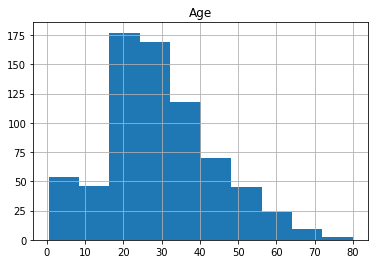

In [3]:
TitanicSurvivalData.hist('Age')

### Exploring data distribution of categorical variables using barplot

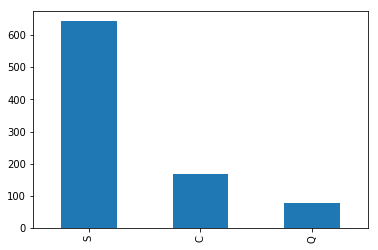

In [4]:
ColumnToPlot=TitanicSurvivalData['Embarked']

# Finding frequency of each value present in Embarked column
ValueCount=ColumnToPlot.value_counts()

# Plotting bar plot
ValueCount.plot.bar()

### Remove Useless Columns

In [5]:
# Data Pre Processing
#Step-1: Deleting those columns which are not useful in predictive analysis because the values are unique for each row
DeleteCols = ['Name','Ticket','Cabin','PassengerId']
TitanicSurvivalData = TitanicSurvivalData.drop(DeleteCols,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
#Printing column names
print(TitanicSurvivalData.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


### Visualizing the important characteristics of a dataset

The plot has been saved at dir:  C:\Users\Piyush\Learnwell Technocrat (Machine Learning)


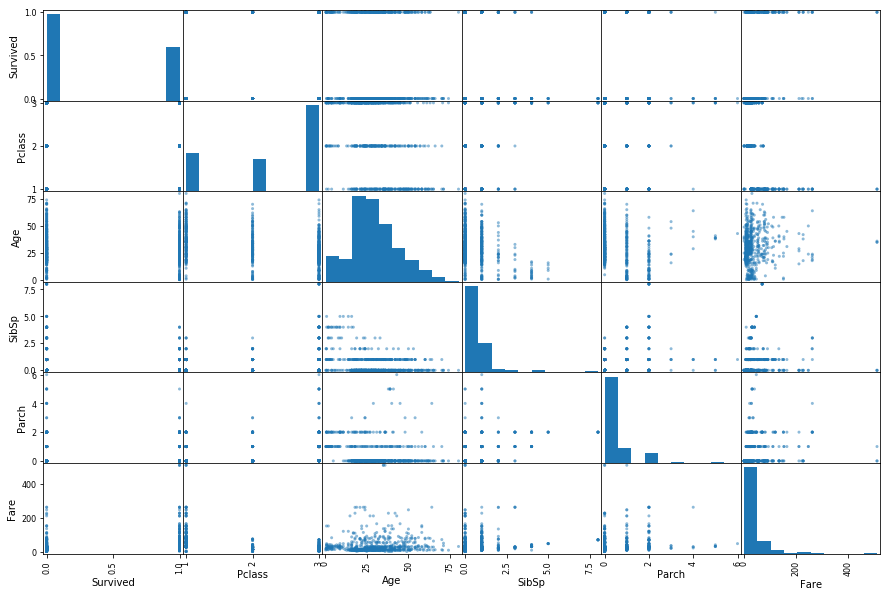

In [8]:
import os
import matplotlib.pyplot as plotObject

columnsForAnalysis = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']

# Plotting scatter plot for every variable vs every other variable
pd.plotting.scatter_matrix(TitanicSurvivalData[columnsForAnalysis], figsize=(15, 10) , marker='.')

# Saving the plot in the current working directory
plotObject.savefig('TitanicSurvivalDataScatterplot.png')
print('The plot has been saved at dir: ',os.getcwd())
# Notice that the categorical variables were excluded from below plot. 
# Since scatter plot can be done only for numeric data

### Missing Values Treatment

In [9]:
# Checking missing values for each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#Step-2.1: Removing those rows where ALL the values are missing
TitanicSurvivalData=TitanicSurvivalData.dropna(axis=0, how='all')

#Step-2.2: Removing those columns where ALL the values are missing
TitanicSurvivalData=TitanicSurvivalData.dropna(axis=1, how='all')

TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
#Step-3: Interpolating the missing values of age using all the present values
TitanicSurvivalData['Age'] = TitanicSurvivalData['Age'].interpolate()
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
# Step-4: Replacing the missing values of categorical column with MODE (most frequent value)
# Finding out the mode value for color column
ModeValueForEmbarked=TitanicSurvivalData['Embarked'].mode()[0]
print('mode value for Embarked column is: ',ModeValueForEmbarked)

mode value for Embarked column is:  S


In [13]:
#Replacing the missing values with MODE value for Embarked column
TitanicSurvivalData['Embarked'].fillna(ModeValueForEmbarked, inplace=True)
TitanicSurvivalData.isnull().sum()
# Now we can see there are NO missing values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### One Hot encoding for categorical columns

In [15]:
#Step-4 Creating One hot encoding for categorical columns
TitanicSurvivalData=pd.get_dummies(TitanicSurvivalData)
TitanicSurvivalData.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Sampling the data into two parts
* 70% For Training the model
* 30% For Testing the model

In [62]:
#Split training Testing datasets
PredictorColumns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
TargetColumn='Survived'

X = TitanicSurvivalData[PredictorColumns].values
y = TitanicSurvivalData[TargetColumn].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       174
           1       0.76      0.76      0.76        94

   micro avg       0.83      0.83      0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

[[152  22]
 [ 23  71]]


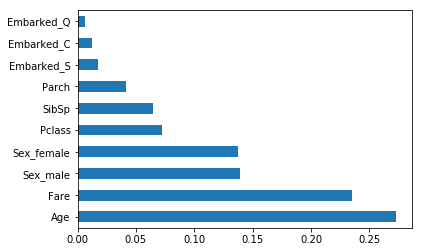

In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,criterion='gini')
print(clf)
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the importance of variables
feature_importances = pd.Series(RF.feature_importances_, index=PredictorColumns)

# Plotting the feature importance for Top 10 most important columns
feature_importances.nlargest(10).plot(kind='barh')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       174
           1       0.75      0.76      0.75        94

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268

[[150  24]
 [ 23  71]]


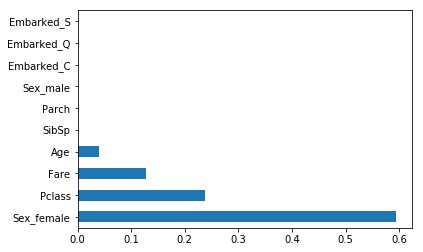

In [18]:
#Decision Trees
from sklearn import tree
#choose from different tunable parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
print(clf)
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the importance of variables
feature_importances = pd.Series(DTree.feature_importances_, index=PredictorColumns)

# Plotting the feature importance for Top 10 most important columns
feature_importances.nlargest(10).plot(kind='barh')

In [49]:
# k-Nearest Neighbor
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print(clf)
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       167
           1       0.71      0.52      0.60       101

   micro avg       0.74      0.74      0.74       268
   macro avg       0.73      0.70      0.70       268
weighted avg       0.73      0.74      0.73       268

[[145  22]
 [ 48  53]]


In [65]:
#SVM(Support Vector Machines)
from sklearn import svm, datasets
clf = svm.SVC(C=10, gamma=0.01)
print(clf)
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       152
           1       0.68      0.67      0.68       116

   micro avg       0.72      0.72      0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268

[[115  37]
 [ 38  78]]


In [72]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
clf = LogisticRegression(C=15,penalty='l2')
print(clf)
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       152
           1       0.75      0.74      0.75       116

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268

[[124  28]
 [ 30  86]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
#Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB
clf = GaussianNB()
#clf = MultinomialNB()
print(clf)
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.85      0.83      0.84       174
          1       0.70      0.72      0.71        94

avg / total       0.80      0.79      0.80       268

[[145  29]
 [ 26  68]]


### Home Work 
* Load the dataset CreditRiskData.csv
* Create all classifier models to predict if a credit is good or not.
* Target Variable is GoodCredit
* Dont look at the answer below please try it on you own!!

In [23]:
# read in the data
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/fhashmi/Data Science using Python/Python Datasets/CreditRiskData.csv')
#df=df[['GoodCredit','checkingstatus1','duration2','history3','amount5']]
df.head()

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [24]:
cols=['GoodCredit','checkingstatus1','duration2','history3','amount5']
df1=pd.get_dummies(df)
df1.head()

,GoodCredit,duration2,amount5,installment8,residence11,age13,cards16,liable18,checkingstatus1_A11,checkingstatus1_A12,...,housing15_A152,housing15_A153,job17_A171,job17_A172,job17_A173,job17_A174,tele19_A191,tele19_A192,foreign20_A201,foreign20_A202
0,0,6,1169,4,4,67,2,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,1,48,5951,2,2,22,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,1,0,1,0,1,0
4,1,24,4870,3,4,53,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0


In [25]:
#Split training Testing datasets
X = df1.values
y = df1['GoodCredit'].values 

X = np.delete(X,0,axis=1)
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
clf = LogisticRegression(C=1,penalty='l1')
print(clf)
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       214
          1       0.56      0.52      0.54        86

avg / total       0.74      0.74      0.74       300

[[178  36]
 [ 41  45]]
